In [1]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 6.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from tld import get_tld, is_tld
from urllib.parse import urlparse
import re
import string

In [3]:
data = pd.read_csv("/kaggle/input/nasaurl/urls1.csv")

In [4]:
data

url
0                                https://www.nasa.gov/
1                                https://www.nasa.gov/
2                           https://www.nasa.gov/news/
3                  https://www.nasa.gov/news/all-news/
4                        https://plus.nasa.gov/series/
..                                                 ...
276                               http://oig.nasa.gov/
277    https://www.nasa.gov/budgets-plans-and-reports/
278  https://www.nasa.gov/organizations/budget-annu...
279                 https://www.nasa.gov/contact-nasa/
280                https://www.nasa.gov/accessibility/

[281 rows x 1 columns]

In [5]:
data.info()
# data["type"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     281 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [6]:
# class_dist = data["type"].value_counts()

In [7]:
# sns.barplot(x=class_dist.index, y = class_dist.values)

In [8]:
data['url'] = data['url'].replace('www.', '', regex=True)




In [9]:
data

url
0                                    https://nasa.gov/
1                                    https://nasa.gov/
2                               https://nasa.gov/news/
3                      https://nasa.gov/news/all-news/
4                        https://plus.nasa.gov/series/
..                                                 ...
276                               http://oig.nasa.gov/
277        https://nasa.gov/budgets-plans-and-reports/
278  https://nasa.gov/organizations/budget-annual-r...
279                     https://nasa.gov/contact-nasa/
280                    https://nasa.gov/accessibility/

[281 rows x 1 columns]

In [10]:
def pri_domain(url):
    
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except:
        pri_domain = None

    return pri_domain

def abnormal_url(url):
    hostname = str(urlparse(url).hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

def httpSecure(url):
    htp = urlparse(url).scheme
    if str(htp)=='https':
        return 1
    else:
        return 0

def digit_count(url):
    digits = 0
    for ch in url:
        if ch.isnumeric():
            digits = digits + 1
    return digits

def special_count(url):
    special_chars = set(string.punctuation)
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

def letter_count(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def URL_Shortening(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
def having_ip(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    


In [11]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))
    
data['pri_domain'] = data['url'].apply(lambda x: pri_domain(x))
data['abnormal_url'] = data['url'].apply(lambda x: abnormal_url(x))
data['httpSecure'] = data['url'].apply(lambda x: httpSecure(x))
data['digits'] = data['url'].apply(lambda x: digit_count(x))
data['special_chars'] = data['url'].apply(lambda x: special_count(x))
data['letter_count'] = data['url'].apply(lambda x: letter_count(x))
data['url_shortend'] = data['url'].apply(lambda x: URL_Shortening(x))
data['have_ip'] = data['url'].apply(lambda x : having_ip(x))

In [12]:
sns.countplot(x='abnormal_url', data=data)

<Axes: xlabel='abnormal_url', ylabel='count'>

<Axes: xlabel='httpSecure', ylabel='count'>

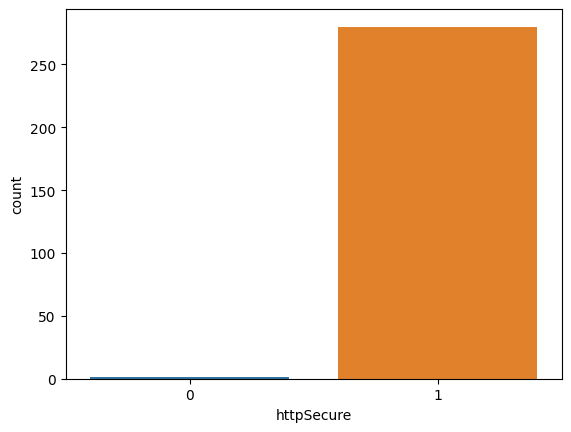

In [13]:
sns.countplot(x='httpSecure', data=data)

<Axes: xlabel='url_shortend', ylabel='count'>

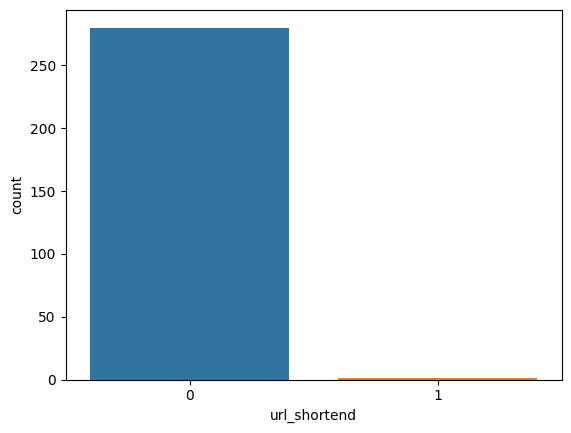

In [14]:
sns.countplot(x='url_shortend', data=data)

<Axes: xlabel='have_ip', ylabel='count'>

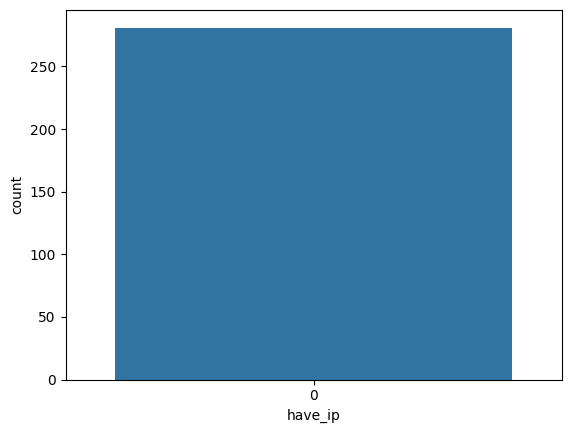

In [15]:
sns.countplot(x='have_ip', data=data)

In [16]:
data_label=data

In [17]:
X = data.drop(['url', 'pri_domain'], axis=1)

In [18]:
X

@  ?  -  =  .  #  %  +  $  !  *  ,  //  abnormal_url  httpSecure  digits  \
0    0  0  0  0  1  0  0  0  0  0  0  0   1             1           1       0   
1    0  0  0  0  1  0  0  0  0  0  0  0   1             1           1       0   
2    0  0  0  0  1  0  0  0  0  0  0  0   1             1           1       0   
3    0  0  1  0  1  0  0  0  0  0  0  0   1             1           1       0   
4    0  0  0  0  2  0  0  0  0  0  0  0   1             1           1       0   
..  .. .. .. .. .. .. .. .. .. .. .. ..  ..           ...         ...     ...   
276  0  0  0  0  2  0  0  0  0  0  0  0   1             1           0       0   
277  0  0  3  0  1  0  0  0  0  0  0  0   1             1           1       0   
278  0  0  4  0  1  0  0  0  0  0  0  0   1             1           1       0   
279  0  0  1  0  1  0  0  0  0  0  0  0   1             1           1       0   
280  0  0  0  0  1  0  0  0  0  0  0  0   1             1           1       0   

     special_chars  letter_count  url_shortend  have_ip  
0                5            12             0        0  
1                5            12             0        0  
2                6            16             0        0  
3                8            23             0        0  
4                7            22             0        0  
..             ...           ...           ...      ...  
276              6            14             0        0  
277              9            34             0        0  
278             12            66             0        0  
279              7            23             0        0  
280              6            25             0        0  

[281 rows x 20 columns]

In [19]:
X_test=X

In [20]:
import pickle
pickle_file_path = "/kaggle/input/urlmodel/random_forest.pkl"
with open(pickle_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [21]:
predictions = loaded_model.predict(X_test)

In [22]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

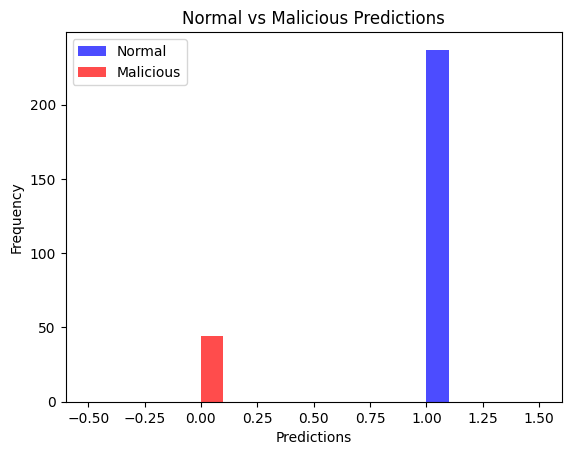

In [23]:
import matplotlib.pyplot as plt

# Assuming predictions contains 0 for malicious and 1 for normal
normal_predictions = predictions[predictions == 1]
malicious_predictions = predictions[predictions == 0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plotting the normal predictions
ax.hist(normal_predictions, color='blue', alpha=0.7, label='Normal')

# Plotting the malicious predictions
ax.hist(malicious_predictions, color='red', alpha=0.7, label='Malicious')

# Adding labels and legend
ax.set_xlabel('Predictions')
ax.set_ylabel('Frequency')
ax.set_title('Normal vs Malicious Predictions')
ax.legend()

# Display the plot
plt.show()
